In [22]:
import scipy.io as sio
import pandas as pd
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Dropout
from keras.regularizers import l1, l2
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

In [23]:
mat_train = sio.loadmat("./AgeGenderClassification/eventrain.mat")
mat_test = sio.loadmat("./AgeGenderClassification/eventest.mat")
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]

In [24]:
print(data_train[0].shape)
print(data_test[0].shape)

(3500, 14)
(1050, 14)


b) Eliga cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo neuronal denso. Además extraiga las etiquetas del problema. Describa los datos utilizados.

In [25]:
genFeat = data_train[0]  #it can be used as representation: contextual features
ageClass = data_train[1] #target
ffcoefs = data_train[3]   #it can be used as representation: fisherface space
faceGist = data_train[4]  #it can be used as representation

In [26]:
total=len(data_train[0])
genFeatTrain = data_train[0][:int(0.75*total)]     #75% de los datos
genFeatVal = data_train[0][int(0.75*total):]       #25% de los datos

total=len(data_train[1])
ageClassTrain = data_train[1][:int(0.75*total)]     #75% de los datos
ageClassVal = data_train[1][int(0.75*total):]       #25% de los datos

total=len(data_train[3])
ffcoefsTrain = data_train[3][:int(0.75*total)]     #75% de los datos
ffcoefsVal = data_train[3][int(0.75*total):]       #25% de los datos

total=len(data_train[4])
faceGistTrain = data_train[4][:int(0.75*total)]     #75% de los datos
faceGistVal = data_train[4][int(0.75*total):]       #25% de los datos

In [27]:
genFeatTest = data_test[0]  #it can be used as representation: contextual features
ageClassTest = data_test[1] #target
ffcoefsTest = data_test[3]   #it can be used as representation: fisherface space
faceGistTest = data_test[4]  #it can be used as representation

In [34]:
scaler = StandardScaler().fit(genFeatTrain)
genFeatTrain_scaled = pd.DataFrame(scaler.transform(genFeatTrain))
genFeatVal_scaled   = pd.DataFrame(scaler.transform(genFeatVal))
genFeatTest_scaled  = pd.DataFrame(scaler.transform(genFeatTest))

scaler = StandardScaler().fit(ffcoefsTrain)
ffcoefsTrain_scaled = pd.DataFrame(scaler.transform(ffcoefsTrain))
ffcoefsVal_scaled   = pd.DataFrame(scaler.transform(ffcoefsVal))
ffcoefsTest_scaled  = pd.DataFrame(scaler.transform(ffcoefsTest))

scaler = StandardScaler().fit(faceGistTrain)
faceGistTrain_scaled = pd.DataFrame(scaler.transform(faceGistTrain))
faceGistVal_scaled   = pd.DataFrame(scaler.transform(faceGistVal))
faceGistTest_scaled  = pd.DataFrame(scaler.transform(faceGistTest))

#ageClassTrain_scaled = genFeatTrain_scaled.values.reshape(-1,1)
#ageClassVal_scaled = genFeatVal_scaled.values.reshape(-1,1)
#ageClassTest_scaled = genFeatTest_scaled.values.reshape(-1,1)

c) Defina y entrene una modelo de red neuronal *feed forward* para la inferencia de la edad de la persona a través de la representación escogida. Intente llegar a un *mse* menor a 100 en el conjunto de pruebas. Recuerde que **NO** puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.

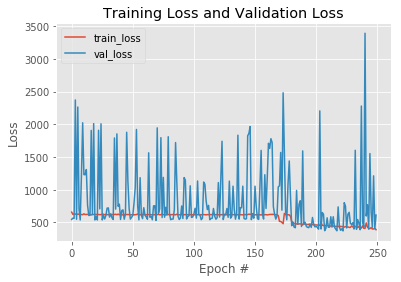

1050/1050 [==============================] - 0s 48us/step


491.3069416155134

In [29]:
x_train = genFeatTrain_scaled
x_val = genFeatVal_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model.fit(genFeatTrain_scaled, ageClassTrain, epochs=250, verbose=0, 
          validation_data=(genFeatVal_scaled, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(genFeatTest_scaled, ageClassTest)

# 2do Intento

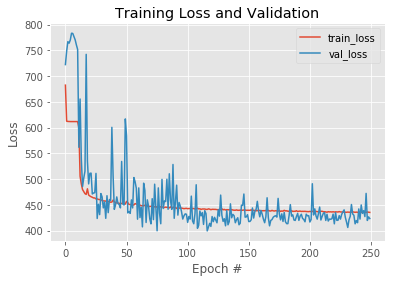

1050/1050 [==============================] - 0s 74us/step


402.5475859142485

In [30]:
x_train = genFeatTrain_scaled
x_val = genFeatVal_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(genFeatTest_scaled, ageClassTest)

# 3er Intento

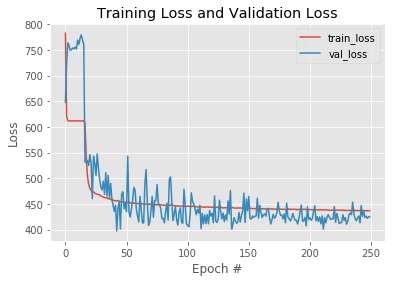

1050/1050 [==============================] - 0s 62us/step


406.2368779645647

In [31]:
x_train = genFeatTrain_scaled
x_val = genFeatVal_scaled
x_test = genFeatTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# 4to Intento
Mismo que el 2do, pero con activación _softplus_

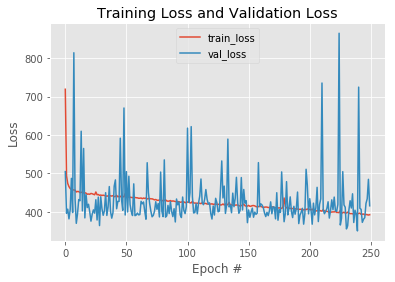

1050/1050 [==============================] - 0s 88us/step


390.32154247465587

In [32]:
x_train = genFeatTrain_scaled
x_val = genFeatVal_scaled
x_test = genFeatTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# 5to Intento
Mismo que el 2do, pero con 1 capa extra

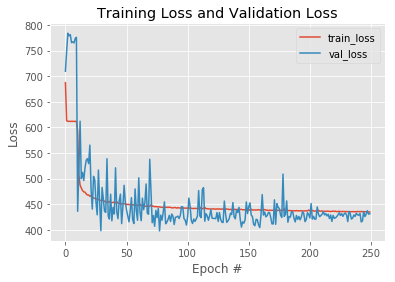

1050/1050 [==============================] - 0s 77us/step


405.2710336449033

In [33]:
x_train = genFeatTrain_scaled
x_val = genFeatVal_scaled
x_test = genFeatTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')
model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# 6to Intento
Igual que el 4to, pero con otra representación

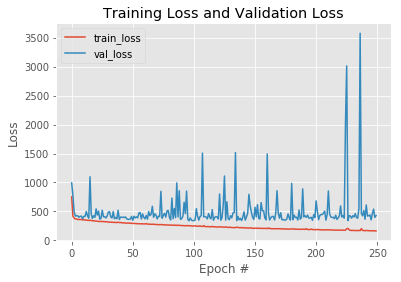

1050/1050 [==============================] - 0s 81us/step


471.46046654110864

In [35]:
x_train = ffcoefsTrain_scaled
x_val = ffcoefsVal_scaled
x_test = ffcoefsTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# 7to Intento

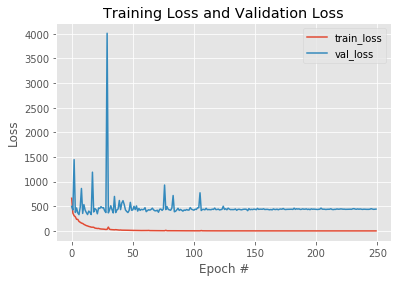

1050/1050 [==============================] - 0s 113us/step


516.6926901390439

In [36]:
x_train = faceGistTrain_scaled
x_val = faceGistVal_scaled
x_test = faceGistTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# 8vo Intento

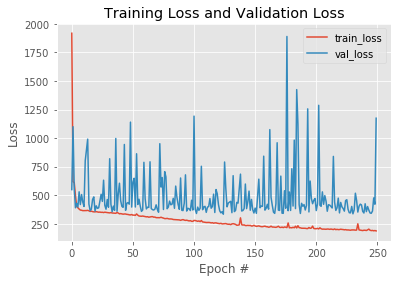

1050/1050 [==============================] - 0s 191us/step


955.5883451915922

In [37]:
x_train = ffcoefsTrain_scaled
x_val = ffcoefsVal_scaled
x_test = ffcoefsTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='softplus'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# 9vo Intento

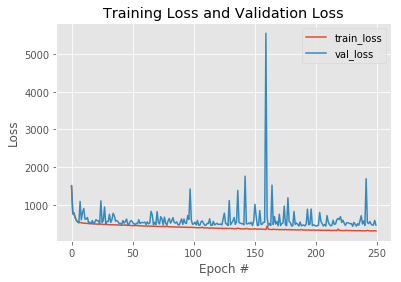

1050/1050 [==============================] - 0s 105us/step


529.8274764578683

In [38]:
x_train = ffcoefsTrain_scaled
x_val = ffcoefsVal_scaled
x_test = ffcoefsTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# 10 Intento

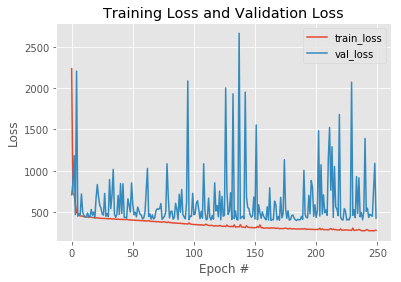

1050/1050 [==============================] - 0s 130us/step


475.0487219238281

In [39]:
x_train = ffcoefsTrain_scaled
x_val = ffcoefsVal_scaled
x_test = ffcoefsTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.01)))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.01)))
model.add(Activation('softplus'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# 11vo

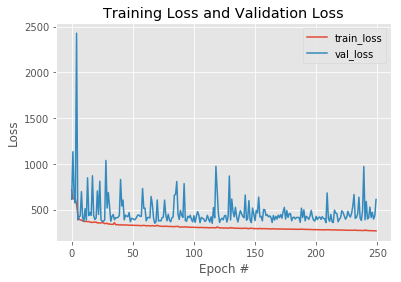

1050/1050 [==============================] - 0s 101us/step


570.1955523390997

In [40]:
x_train = ffcoefsTrain_scaled
x_val = ffcoefsVal_scaled
x_test = ffcoefsTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform'))
model.add(Activation('softplus'))
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform'))
model.add(Activation('softplus'))
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform'))
model.add(Activation('softplus'))
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform'))
model.add(Activation('softplus'))
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform'))
model.add(Activation('softplus'))
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform'))
model.add(Activation('softplus'))
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform'))
model.add(Activation('softplus'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# 12

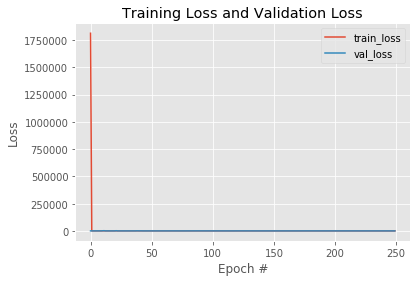

1050/1050 [==============================] - 0s 183us/step


427.771774437314

In [41]:
x_train = ffcoefsTrain_scaled
x_val = ffcoefsVal_scaled
x_test = ffcoefsTest_scaled

model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
model.add(Activation('softplus'))
model.add(Dense(512, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
model.add(Activation('softplus'))
model.add(Dense(512, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
model.add(Activation('softplus'))
model.add(Dense(512, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
model.add(Activation('softplus'))
model.add(Dense(512, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
model.add(Activation('softplus'))
model.add(Dense(512, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
model.add(Activation('softplus'))
model.add(Dense(512, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
model.add(Activation('softplus'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

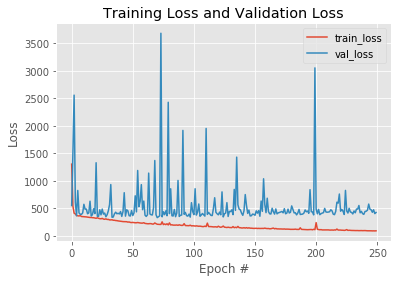

1050/1050 [==============================] - 0s 120us/step


492.79134230840776

In [46]:
x_train = ffcoefsTrain_scaled
x_val = ffcoefsVal_scaled
x_test = ffcoefsTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(1, kernel_initializer="lecun_uniform", activation='linear'))
model.compile(optimizer=Adagrad(lr=0.01),loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

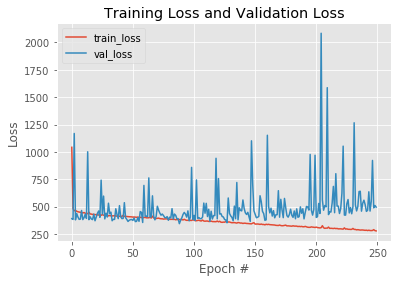

1050/1050 [==============================] - 0s 115us/step


453.73068638392857

In [47]:
x_train = genFeatTrain_scaled
x_val = genFeatVal_scaled
x_test = genFeatTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softplus'))
model.add(Dense(1, kernel_initializer="lecun_uniform", activation='linear'))
model.compile(optimizer=Adagrad(lr=0.01),loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

In [ ]:
x_train = ffcoefsTrain_scaled
x_val = ffcoefsVal_scaled
x_test = ffcoefsTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(1, kernel_initializer="lecun_uniform", activation='linear'))
model.compile(optimizer=Adagrad(lr=0.01),loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

In [ ]:
x_train = genFeatTrain_scaled
x_val = genFeatVal_scaled
x_test = genFeatTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(1, kernel_initializer="lecun_uniform", activation='linear'))
model.compile(optimizer=Adagrad(lr=0.01),loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

In [ ]:
x_train = genFeatTrain_scaled
x_val = genFeatVal_scaled
x_test = genFeatTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('softsign'))
model.add(Dense(1, kernel_initializer="lecun_uniform", activation='linear'))
model.compile(optimizer=Adagrad(lr=0.01),loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

In [ ]:
x_train = genFeatTrain_scaled
x_val = genFeatVal_scaled
x_test = genFeatTest_scaled

model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(256, kernel_initializer="lecun_uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer="lecun_uniform", activation='linear'))
model.compile(optimizer=Adagrad(lr=0.01),loss='mean_squared_error')

model.fit(x_train, ageClassTrain, epochs=250, verbose=0, validation_data=(x_val, ageClassVal))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 250), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 250), model.history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.evaluate(x_test, ageClassTest)

# KFold de optimizadores

In [45]:
Xm = genFeatTrain_scaled
x_train = genFeatTrain_scaled
ym = ageClassTrain
kfold = KFold(n_splits=5)
opts = [Adagrad(lr=0.01), Adadelta(lr=0.01), RMSprop(lr=0.01), Adam(lr=0.01), SGD(lr=0.01)]
cvscores = []
all_mse_cv = []
for opt in opts:
    for train, val in kfold.split(Xm):
        model = Sequential()
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer='uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer='uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer='uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer='uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer='uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer='uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
        model.compile(optimizer=opt,loss='mean_squared_error')
        model.fit(Xm[train], ym[train], epochs=250, verbose=0)
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    all_mse_cv.append(mse_cv)
indexModel = all_mse_cv.index(min(all_mse_cv))

KeyError: '[ 525  526  527 ... 2622 2623 2624] not in index'

In [ ]:
print("Optimizador que entrega el mejor modelo con K = 5: ",  opts[indexModel])

In [12]:
Xm = ffcoefs
x_train = ffcoefs
ym = ageClass
kfold = KFold(n_splits=5)
lrates = [0.01, 0.05, 0.1, 0.2]
cvscores = []
all_mse_cv = []
for lr in lrates:
    for train, val in kfold.split(Xm):
        model = Sequential()
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
        model.add(Activation('softplus'))
        model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
        model.compile(optimizer=Adagrad(lr=lr),loss='mean_squared_error')
        model.fit(Xm[train], ym[train], epochs=150, verbose=0)
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    all_mse_cv.append(mse_cv)
indexModel = all_mse_cv.index(min(all_mse_cv))

700/700 [==============================] - 1s 992us/step


In [13]:
print("Learning rate para Adagrad con K = 5: ",  lrates[indexModel])

Learning rate para Adagrad con K = 5:  0.01


In [14]:
Xm = ffcoefs
x_train = ffcoefs
ym = ageClass
kfold = KFold(n_splits=5)
initializers = ["uniform", "lecun_uniform", "glorot_uniform", "he_uniform", "glorot_normal"]
cvscores = []
all_mse_cv = []
for initializer in initializers:
    for train, val in kfold.split(Xm):
        model = Sequential()
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer=initializer))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation('softplus'))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation('softplus'))
        model.add(Dense(1, kernel_initializer=initializer, activation='linear'))
        model.compile(optimizer=Adagrad(lr=0.01),loss='mean_squared_error')
        model.fit(Xm[train], ym[train], epochs=150, verbose=0)
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    all_mse_cv.append(mse_cv)
indexModel = all_mse_cv.index(min(all_mse_cv))

700/700 [==============================] - 1s 1ms/step


In [15]:
print("Kernel Initializer K = 5: ",  initializers[indexModel])

Kernel Initializer K = 5:  lecun_uniform


In [19]:
Xm = ffcoefs
x_train = ffcoefs
ym = ageClass
kfold = KFold(n_splits=5)
activations = ["hard_sigmoid", "tanh", "sigmoid", "softplus", "softsign"]
initializer = "lecun_uniform"
cvscores = []
all_mse_cv = []
for activation in activations:
    for train, val in kfold.split(Xm):
        model = Sequential()
        model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer=initializer))
        model.add(Activation(activation))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation(activation))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation(activation))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation(activation))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation(activation))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation(activation))
        model.add(Dense(256, kernel_initializer=initializer))
        model.add(Activation(activation))
        model.add(Dense(1, kernel_initializer=initializer, activation='linear'))
        model.compile(optimizer=Adagrad(lr=0.01),loss='mean_squared_error')
        model.fit(Xm[train], ym[train], epochs=150, verbose=0)
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    all_mse_cv.append(mse_cv)
indexModel = all_mse_cv.index(min(all_mse_cv))

700/700 [==============================] - 2s 3ms/step


In [20]:
print("Activation Function K = 5: ",  activations[indexModel])

Activation Function K = 5:  softsign
